In [158]:
import pandas as pd 

In [263]:
#load the data 

cmc_registered = pd.read_csv("../data/RegisteredCasesattheCommunityMediationCentre.csv")
cmc_relationship = pd.read_csv("../data/RelationshipofPartiesinCasesRegisteredattheCommunityMediationCentre.csv")
cmc_source = pd.read_csv("../data/SourceofCasesRegisteredattheCommunityMediationCentre.csv")
cmc_outcome = pd.read_csv("../data/OutcomeofCasesRegisteredattheCommunityMediationCentre.csv")

In [264]:
cmc_full = pd.merge(cmc_registered, cmc_relationship, on = 'case_number', how = 'left')
cmc_full = pd.merge(cmc_full, cmc_source, on = 'case_number', how = 'left')
cmc_full = pd.merge(cmc_full, cmc_outcome, on = 'case_number', how = 'left')

In [265]:
cmc_full['date_registered'] = pd.to_datetime(cmc_full['date_registered'])
cmc_full = cmc_full.dropna()

In [266]:
cmc_full.type_of_intake.value_counts() #need to reorder the type of dispute 

type_of_intake
Courts                                                         1960
External Agency                                                1454
Direct Intake                                                   948
Court-Ordered- Magistrate's Complaint                           871
Applications through Contact Centre                             725
External Agency Referrals - Singapore Police Force (SPF)        434
External Agency Referrals - Housing Development Board (HDB)     303
External Agency Referrals - Member of Parliament                240
Walk Ins                                                        119
External Agency Referrals - Others                               59
External Agency Referrals - Town Council                         54
External Agency Referrals -Member of Parliament                   5
Direct Correspondence                                             5
Court-Ordered (Community Dispute Resolution Tribunal)             5
External Agency Referrals -Housin

In [267]:
#cleanup of data 
cmc_full.type_of_intake = cmc_full.type_of_intake.replace({"Court-Ordered- Magistrate's Complaint \\": "Court-Ordered", 
                                                           "External Agency Referrals  -Others": "Others",
                                                           "External Agency Referrals -Housing Development Board (HDB)": "External Agency Referrals - Housing Development Board (HDB)",
                                                          "External Agency Referrals -Town Council": "Others",
                                                          "External Agency Referrals": "Others", 
                                                          "External Agency Referrals -Member of Parliament": "External Agency Referrals - Member of Parliament",
                                                          "Court-Ordered (Community Dispute Resolution Tribunal)": "Court-Ordered", 
                                                          "Court-Ordered- Magistrate's Complaint": "Court-Ordered", 
                                                          "Direct Correspondence": "Others", 
                                                          "External Agency Referrals - Others": "Others", 
                                                          "External Agency Referrals - Town Council": "Others"})

In [268]:
cmc_full.type_of_intake.value_counts() 

type_of_intake
Courts                                                         1960
External Agency                                                1454
Direct Intake                                                   948
Court-Ordered                                                   877
Applications through Contact Centre                             725
External Agency Referrals - Singapore Police Force (SPF)        434
External Agency Referrals - Housing Development Board (HDB)     307
External Agency Referrals - Member of Parliament                245
Others                                                          124
Walk Ins                                                        119
Name: count, dtype: int64

In [269]:
cmc_full.type_of_dispute.value_counts()

type_of_dispute
Neighbour                              4837
Others                                 1112
Friends                                 510
Family                                  507
Commercial Entity and An Individual     128
Commercial Entities                      51
Strangers                                21
Landlord-Tenant                          14
Colleagues                               13
Name: count, dtype: int64

In [270]:
cmc_full.type_of_dispute = cmc_full.type_of_dispute.replace({"Commercial Entity and An Individual": "Commercial Entities/ And an Individual", 
                                                           "Commercial Entities": "Commercial Entities/ And an Individual",
                                                           "Strangers": "Others",
                                                          "Landlord-Tenant": "Others",
                                                          "Colleagues": "Others"})

In [271]:
cmc_full.type_of_dispute.value_counts()

type_of_dispute
Neighbour                                 4837
Others                                    1160
Friends                                    510
Family                                     507
Commercial Entities/ And an Individual     179
Name: count, dtype: int64

In [272]:
cmc_full.outcome_of_cases.value_counts() #approach as a multi-class classification problem 

outcome_of_cases
Not Mediated                    4417
Mediation With Settlement       2069
Mediation Without Settlement     707
Name: count, dtype: int64

In [273]:
cmc_full['mediated'] = cmc_full['outcome_of_cases'].apply(lambda x: 0 if 'Not' in x else 1)

In [274]:
#label encode the target variables 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cmc_full["outcome_encoded"] = label_encoder.fit_transform(cmc_full['outcome_of_cases'])

In [275]:
# one hot encode the type of dispute, type of intake variables 
cmc_full= pd.get_dummies(cmc_full, columns=["type_of_dispute", "type_of_intake"], drop_first=True, dtype=int)
cmc_full

,date_registered,case_number,outcome_of_cases,mediated,outcome_encoded,type_of_dispute_Family,type_of_dispute_Friends,type_of_dispute_Neighbour,type_of_dispute_Others,type_of_intake_Court-Ordered,type_of_intake_Courts,type_of_intake_Direct Intake,type_of_intake_External Agency,type_of_intake_External Agency Referrals - Housing Development Board (HDB),type_of_intake_External Agency Referrals - Member of Parliament,type_of_intake_External Agency Referrals - Singapore Police Force (SPF),type_of_intake_Others,type_of_intake_Walk Ins
0,2011-01-03,CAS-02624-B3K1R0,Not Mediated,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0
1,2011-01-03,CAS-02766-L1V3G1,Not Mediated,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2011-01-03,CAS-02549-D6L2N3,Not Mediated,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0
3,2011-01-03,CAS-02376-R0X8R9,Not Mediated,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0
4,2011-01-04,CAS-02790-Y9S0Y4,Mediation With Settlement,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,2015-12-30,CAS-08253-T9N4Z0,Mediation With Settlement,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7190,2015-12-30,CAS-08254-T5M1H7,Not Mediated,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0
7191,2015-12-30,CAS-08255-J9Z0Z7,Not Mediated,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0
7192,2015-12-30,CAS-08256-X6Z5N5,Not Mediated,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0


In [276]:
cmc_full['year_registered'] = cmc_full['date_registered'].dt.year
cmc_full['month_registered'] = cmc_full['date_registered'].dt.month
cmc_full['day_registered'] = cmc_full['date_registered'].dt.day
cmc_full['quarter_registered'] = cmc_full['date_registered'].dt.quarter

In [277]:
cmc_full

,date_registered,case_number,outcome_of_cases,mediated,outcome_encoded,type_of_dispute_Family,type_of_dispute_Friends,type_of_dispute_Neighbour,type_of_dispute_Others,type_of_intake_Court-Ordered,...,type_of_intake_External Agency,type_of_intake_External Agency Referrals - Housing Development Board (HDB),type_of_intake_External Agency Referrals - Member of Parliament,type_of_intake_External Agency Referrals - Singapore Police Force (SPF),type_of_intake_Others,type_of_intake_Walk Ins,year_registered,month_registered,day_registered,quarter_registered
0,2011-01-03,CAS-02624-B3K1R0,Not Mediated,0,2,0,1,0,0,0,...,0,0,0,0,0,0,2011,1,3,1
1,2011-01-03,CAS-02766-L1V3G1,Not Mediated,0,2,0,0,1,0,0,...,1,0,0,0,0,0,2011,1,3,1
2,2011-01-03,CAS-02549-D6L2N3,Not Mediated,0,2,0,0,1,0,0,...,1,0,0,0,0,0,2011,1,3,1
3,2011-01-03,CAS-02376-R0X8R9,Not Mediated,0,2,0,0,1,0,0,...,1,0,0,0,0,0,2011,1,3,1
4,2011-01-04,CAS-02790-Y9S0Y4,Mediation With Settlement,1,0,0,0,1,0,0,...,0,0,0,0,0,0,2011,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,2015-12-30,CAS-08253-T9N4Z0,Mediation With Settlement,1,0,0,0,1,0,0,...,0,1,0,0,0,0,2015,12,30,4
7190,2015-12-30,CAS-08254-T5M1H7,Not Mediated,0,2,0,0,1,0,0,...,0,1,0,0,0,0,2015,12,30,4
7191,2015-12-30,CAS-08255-J9Z0Z7,Not Mediated,0,2,0,0,1,0,0,...,0,0,0,1,0,0,2015,12,30,4
7192,2015-12-30,CAS-08256-X6Z5N5,Not Mediated,0,2,0,0,1,0,0,...,0,1,0,0,0,0,2015,12,30,4


# Train a base random forest classifier to predict the outcome 

In [278]:
from sklearn.model_selection import train_test_split

#define X and y and (drop non-useful columns)
X = cmc_full.drop(columns=["case_number", "outcome_of_cases", "date_registered", "outcome_of_cases", "outcome_encoded", "mediated"])
y = cmc_full["outcome_encoded"]

#stratified split so that the labels are represented in the train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                              precision    recall  f1-score   support

   Mediation With Settlement       0.37      0.34      0.35       414
Mediation Without Settlement       0.12      0.10      0.11       141
                Not Mediated       0.69      0.74      0.72       884

                    accuracy                           0.56      1439
                   macro avg       0.40      0.39      0.39      1439
                weighted avg       0.55      0.56      0.55      1439



In [280]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss", use_label_encoder=False)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

                              precision    recall  f1-score   support

   Mediation With Settlement       0.43      0.35      0.39       414
Mediation Without Settlement       0.19      0.09      0.12       141
                Not Mediated       0.71      0.83      0.76       884

                    accuracy                           0.62      1439
                   macro avg       0.44      0.42      0.43      1439
                weighted avg       0.58      0.62      0.59      1439



/home/racheltlw/Desktop/FDT/.venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:59:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


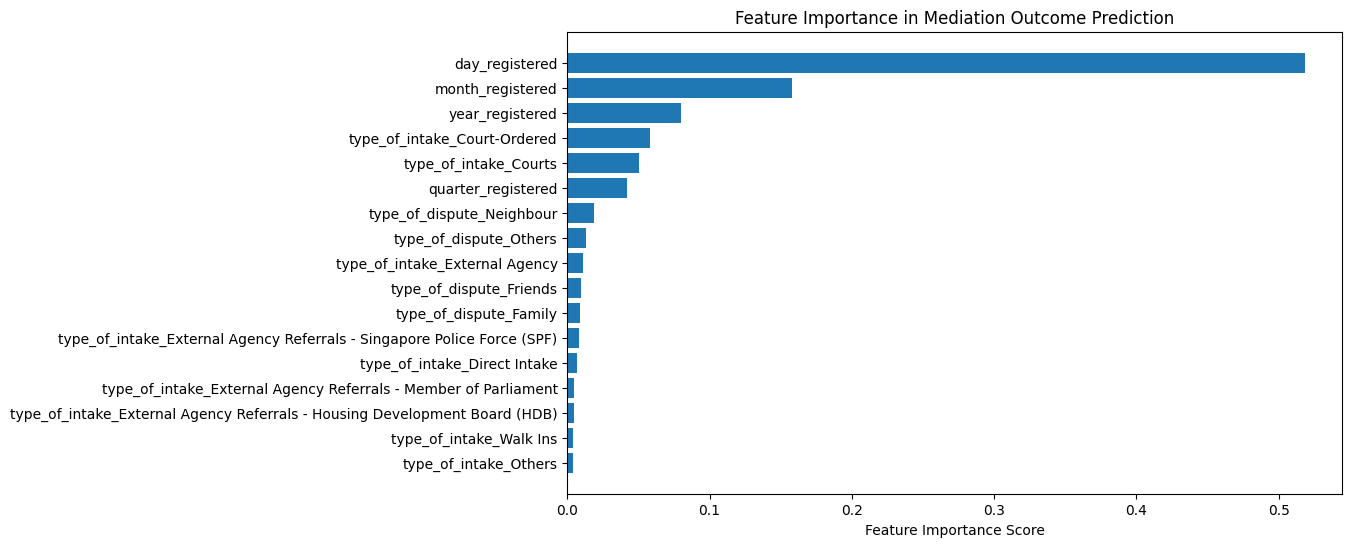

In [281]:
import matplotlib.pyplot as plt
import numpy as np

# Feature Importance (Random Forest)
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance in Mediation Outcome Prediction")
plt.show()

#perhaps too much emphasis on the day registered in order to predict the result - try to drop the date and see if that improves the model 

In [282]:
#trial  - a one vs rest classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Define base classifier (Random Forest or any other model)
base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply One-vs-Rest strategy
ovr_model = OneVsRestClassifier(base_model)

# Train the model
ovr_model.fit(X_train, y_train)

# Predict
y_pred = ovr_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.34      0.35       414
           1       0.14      0.11      0.12       141
           2       0.69      0.75      0.72       884

    accuracy                           0.57      1439
   macro avg       0.40      0.40      0.40      1439
weighted avg       0.55      0.57      0.56      1439



In [285]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Define base model
base_model =  GradientBoostingClassifier(n_estimators=100, random_state=42)

# Apply One-vs-One strategy
ovo_model = OneVsOneClassifier(base_model)

# Train model
ovo_model.fit(X_train, y_train)

# Predict
y_pred = ovo_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.41      0.44       414
           1       0.40      0.04      0.08       141
           2       0.71      0.86      0.78       884

    accuracy                           0.65      1439
   macro avg       0.53      0.44      0.43      1439
weighted avg       0.61      0.65      0.61      1439



## Trying an ensemble approach for multiple classifiers

In [329]:
#model doing quite well at predicting if the case is not mediated, however not able to predict well between Mediation With Settlement and Mediation Without Settlement 
#trying 2 binary classification models instead to see if a waterfall approach might work better 

#define X and y and (drop non-useful columns)
X2 = cmc_full.drop(columns=["case_number", "outcome_of_cases", "date_registered", "outcome_of_cases", "outcome_encoded", "mediated"])
y2 = cmc_full['outcome_of_cases']

X_med_train, X_med_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

y_med_train = (y2_train != "Not Mediated").astype(int)
y_med_test = (y2_test != "Not Mediated").astype(int)

#filter for only those that have been mediated 
X_settle_train = X_med_train[y2_train != "Not Mediated"]
#binary outcome for all cases that have been mediated with settlement as 1, and cases that are mediated without settlement as 0 
y_settle_train = (y2_train[y2_train != "Not Mediated"] == "Mediation With Settlement").astype(int)

X_settle_test = X_med_test[y2_test != "Not Mediated"]
y_settle_test = (y2_test[y2_test != "Not Mediated"] == "Mediation With Settlement").astype(int)



In [ ]:
from sklearn.metrics import accuracy_score

model_med = RandomForestClassifier(n_estimators=100, random_state=42)
model_med.fit(X_med_train, y_med_train)

y_med_pred = model_med.predict(X_med_test)


print("Mediation Prediction Accuracy:", accuracy_score(y_med_test, y_med_pred))
print(classification_report(y_med_test, y_med_pred))

Mediation Prediction Accuracy: 0.640722724113968
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       884
           1       0.54      0.51      0.52       555

    accuracy                           0.64      1439
   macro avg       0.62      0.62      0.62      1439
weighted avg       0.64      0.64      0.64      1439



In [ ]:
from sklearn.metrics import accuracy_score

# Train model
settle_model = RandomForestClassifier(n_estimators=100, random_state=42)
settle_model.fit(X_settle_train, y_settle_train)

# Predict
y_settle_pred = settle_model.predict(X_settle_test)

# Evaluate
print("Mediation Prediction Accuracy:", accuracy_score(y_settle_test, y_settle_pred))
print(classification_report(y_settle_test, y_settle_pred))

#2 model approach seems to work better for this 

Mediation Prediction Accuracy: 0.6594594594594595
              precision    recall  f1-score   support

           0       0.26      0.18      0.22       141
           1       0.75      0.82      0.78       414

    accuracy                           0.66       555
   macro avg       0.50      0.50      0.50       555
weighted avg       0.62      0.66      0.64       555



In [352]:
med_prob_train = model_med.predict_proba(X_med_train)[:, 1]
med_prob_test = model_med.predict_proba(X_med_test)[:, 1]

#initialise empty array to map the settle prob back to the mediation dataset 
settle_prob_train_full = np.zeros_like(med_prob_train)
settle_prob_test_full = np.zeros_like(med_prob_test)

settle_prob_train_full[y_med_train == 1] = settle_model.predict_proba(X_settle_train)[:, 1]
settle_prob_test_full[y_med_test == 1] = settle_model.predict_proba(X_settle_test)[:, 1]

#stack the probabilities 
stacked_features_train = np.column_stack((med_prob_train, settle_prob_train_full))
stacked_features_test = np.column_stack((med_prob_test, settle_prob_test_full))

In [354]:
y_train_meta = y2_train.replace({
    "Not Mediated": 0,
    "Mediation Without Settlement": 1,
    "Mediation With Settlement": 2
})

y_test_meta = y2_test.replace({
    "Not Mediated": 0,
    "Mediation Without Settlement": 1,
    "Mediation With Settlement": 2
})

/tmp/ipykernel_443836/2716344562.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_meta = y2_train.replace({
/tmp/ipykernel_443836/2716344562.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_meta = y2_test.replace({


In [355]:
#stack probabilities and train meta classifier 

from sklearn.ensemble import GradientBoostingClassifier

meta_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(stacked_features_train, y_train_meta)

y_pred_meta = meta_classifier.predict(stacked_features_test)

print("Meta-Classifier Performance:")
print(classification_report(y_test_meta, y_pred_meta, target_names=["Not Mediated", "Mediation Without Settlement", "Mediation With Settlement"]))


Meta-Classifier Performance:
                              precision    recall  f1-score   support

                Not Mediated       1.00      0.97      0.99       884
Mediation Without Settlement       0.22      0.19      0.20       141
   Mediation With Settlement       0.75      0.82      0.78       414

                    accuracy                           0.85      1439
                   macro avg       0.66      0.66      0.66      1439
                weighted avg       0.85      0.85      0.85      1439



In [360]:
y2.value_counts()

outcome_of_cases
Not Mediated                    4417
Mediation With Settlement       2069
Mediation Without Settlement     707
Name: count, dtype: int64

In [361]:
len(y2)

7193

In [362]:
#scaling for imbalance in classes 
total_samples = len(y2)
class_counts = {"Not Mediated": 4417, "Mediation Without Settlement": 707, "Mediation With Settlement": 2069}

scale_pos_weight = {cls: total_samples / count for cls, count in class_counts.items()}
print(scale_pos_weight)

{'Not Mediated': 1.6284808693683495, 'Mediation Without Settlement': 10.173974540311175, 'Mediation With Settlement': 3.4765587240212663}


In [363]:
#try using xgboost as a metaclassifier with a scale_pos_weight 

from sklearn.ensemble import GradientBoostingClassifier

xgb_model = xgb.XGBClassifier( objective="multi:softmax", num_class=3, eval_metric="mlogloss", scale_pos_weight=[1.63, 10.17, 3.48], random_state=42)
xgb_model.fit(stacked_features_train, y_train_meta)

y_pred_xgb = xgb_model.predict(stacked_features_test)

print("Meta-Classifier Performance:")
print(classification_report(y_test_meta, y_pred_xgb, target_names=["Not Mediated", "Mediation Without Settlement", "Mediation With Settlement"]))

Meta-Classifier Performance:
                              precision    recall  f1-score   support

                Not Mediated       1.00      0.92      0.96       884
Mediation Without Settlement       0.18      0.21      0.19       141
   Mediation With Settlement       0.76      0.83      0.79       414

                    accuracy                           0.83      1439
                   macro avg       0.64      0.65      0.65      1439
                weighted avg       0.85      0.83      0.84      1439



/home/racheltlw/Desktop/FDT/.venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:19:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [366]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(stacked_features_train, y_train_meta)

In [369]:
from sklearn.ensemble import GradientBoostingClassifier

balance_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
balance_classifier.fit(X_train_balanced, y_train_balanced)

y_pred_balance = balance_classifier.predict(stacked_features_test)

print("Balanced-Classifier Performance:")
print(classification_report(y_test_meta, y_pred_balance, target_names=["Not Mediated", "Mediation Without Settlement", "Mediation With Settlement"]))

Balanced-Classifier Performance:
                              precision    recall  f1-score   support

                Not Mediated       1.00      0.97      0.99       884
Mediation Without Settlement       0.25      0.30      0.27       141
   Mediation With Settlement       0.76      0.75      0.75       414

                    accuracy                           0.84      1439
                   macro avg       0.67      0.67      0.67      1439
                weighted avg       0.86      0.84      0.85      1439



meta classifier performs well at predicting the cases that are not mediated, as well as mediated with settlement. However it struggles with the case of mediation without settlement, likely due to the class imbalance, even with SMOTE, the severe class imbalance causes the model to struggle to predict the thid class which is mediation without settlement. 

Potential improvements 
- gridsearch for all 3 models, likely marginal gains as compared to getting more representative data 


In [370]:
import joblib

model_filename = "mediation_classifier.pkl"

joblib.dump(balance_classifier, model_filename)

print(f"Model saved as {model_filename}")

Model saved as mediation_classifier.pkl
